In [1]:
import pandas as pd
import numpy as np
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns
import re
from sklearn.metrics import accuracy_score
import pickle
import plotly.express as px
import glob

%matplotlib inline

In [2]:
df = pd.read_csv('titanicSummary.csv')

In [3]:
s = df.raw_json[0].replace("\'", "\"")

In [4]:
res = json.loads(s) 

In [5]:
res

{'package:base': ['as.factor',
  'gsub',
  'is.na',
  'mean',
  'nrow',
  'rbind',
  'rep',
  'round',
  'summary',
  'which'],
 'package:stats': ['binomial', 'glm', 'predict'],
 'package:utils': ['read.csv', 'str', 'write.csv']}

In [6]:
packs = map(lambda x: x.replace("\'", "\""), df.raw_json.values) 

In [7]:
df['packs'] = list(packs)

In [8]:
test = json.loads(df.packs[0])

In [9]:
str(test)

"{'package:base': ['as.factor', 'gsub', 'is.na', 'mean', 'nrow', 'rbind', 'rep', 'round', 'summary', 'which'], 'package:stats': ['binomial', 'glm', 'predict'], 'package:utils': ['read.csv', 'str', 'write.csv']}"

In [10]:
string_packages = map(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x), df.raw_json.values)

In [11]:
df['string_packs'] = list(string_packages)

### TF-IDF vectorizer

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import itertools
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.preprocessing import  MinMaxScaler, MaxAbsScaler
from sklearn.cluster import KMeans

In [13]:
corpus = list(df.raw_json.values)

In [42]:
vectorizer = TfidfVectorizer()
tfidfVectors = vectorizer.fit_transform(corpus)

In [50]:
dense_tfidf = tfidfVectors.todense()

In [51]:
dense_tfidf.shape

(416, 675)

In [53]:
df['dense_tf'] = list(dense_tfidf)

In [57]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(tfidfVectors)
    Sum_of_squared_distances.append(kmeans.inertia_)

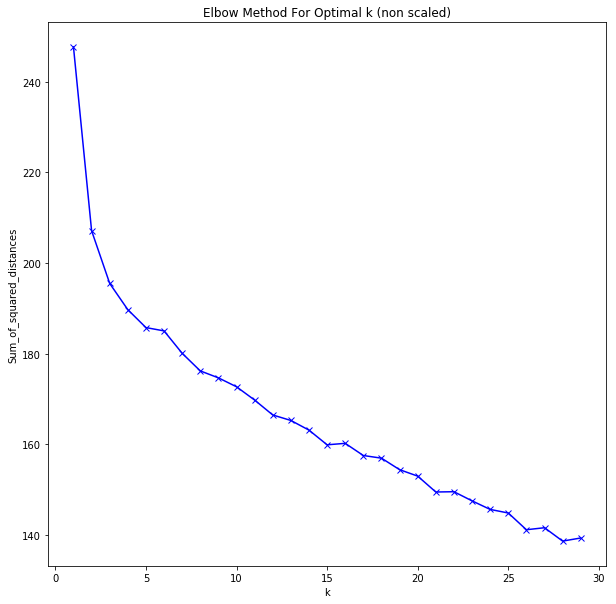

In [58]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [59]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(tfidfVectors)
kmeansLabels = kmeans.predict(tfidfVectors)

In [60]:
df['k-means_labels'] = kmeansLabels

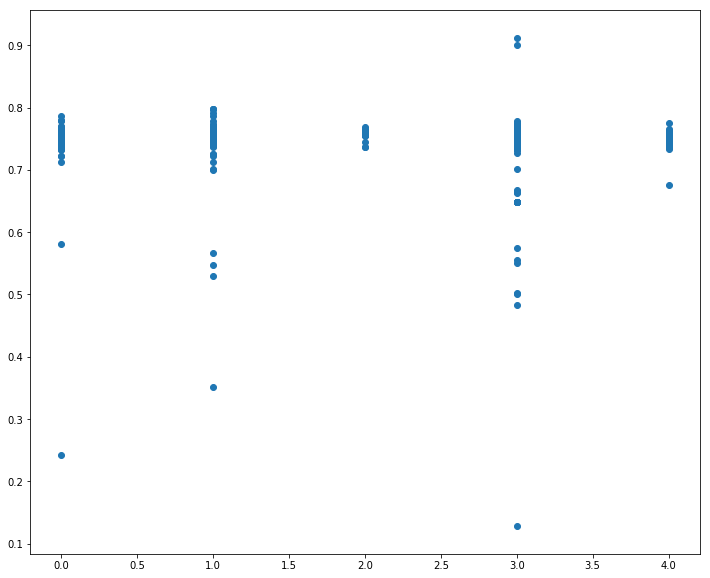

In [67]:
plt.figure(figsize=(12,10))
plt.scatter(x='k-means_labels', y='Accuracy', data=df)

In [71]:
df[df['k-means_labels'] == 3]

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels
0,prabhulingayya-titanic-prediction-using-logist...,0.746,"['as.factor', 'gsub', 'is.na', 'mean', 'nrow',...",['base'],0.344873,"['gsub', 'rbind', 'nrow', 'predict', 'write.cs...",[],"['cnusapbo-titanic-r-code', 'joelweiss-titanic...","[0.9988202265519232, 0.5657821282835571, 0.497...","{'package:base': ['as.factor', 'gsub', 'is.na'...",[[[[[0. 0. 0. 0. ...,3
2,paulocressoni-titanic-using-stepwise-linear-re...,0.756,"['user defined', 'user defined', 'user defined...","['MASS', 'ggplot2', 'ggthemes', 'base']",0.956229,"['gsub', 'as.numeric', 'predict', 'sub', 'mean...",[],['annafreydenzon-titanic-machine-learning-from...,"[0.5025714535073201, 0.4914360717345071, 0.471...","{'character(0)': ['fill_age_by_title'], 'packa...",[[[[[0. 0. 0. 0. ...,3
4,jonmak-identify-travel-groups-in-titanic,0.734,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'data.table', 'stringr', ...",16.105898,"['list', 'mean', 'as.logical', 'merge', 'geom_...",[],"['somtom-titanic-random-icebergs', 'rtreit-kag...","[0.6239748114808571, 0.2672313419911298, 0.170...","{'character(0)': ['`:=`'], 'package:base': ['a...",[[[[[0. 0. 0. 0. ...,3
7,ezhilvelme-titanic-neural-network-c-4-2,0.749,"['compute', 'as.factor', 'c', 'data.frame', 'g...","['dplyr', 'ggplot2', 'neuralnet', 'base']",5.067598,"['gsub', 'neuralnet', 'ifelse', 'write.csv', '...",[],['brirush-randomforest-implementation-of-titan...,"[0.5658840970531664, 0.5658840970531664, 0.529...","{'c(""package:neuralnet"", ""package:dplyr"")': ['...",[[[[[0. 0. 0. 0. ...,3
8,artsyanka-kernel1-titanic-r,0.701,"['as.character', 'as.numeric', 'c', 'cbind', '...","['caTools', 'randomForest', 'base']",0.717785,"['mean', 'ave', 'as.character', 'is.na', 'summ...",[],['thilakshasilva-predicting-titanic-survival-u...,"[0.09903837589370747, 0.09903837589370747, 0.0...","{'package:base': ['as.character', 'as.numeric'...",[[[[[0. 0. 0. 0. ...,3
13,balakesavan-titanicbalakesavan20160921,0.770,"['as.data.frame', 'as.numeric', 'c', 'colnames...","['caret', 'base']",1.676510,"['colnames', 'as.numeric', 'ifelse', 'confusio...",[],['prabhulingayya-titanic-prediction-using-logi...,"[0.09013728602561581, 0.09003094444888107, 0.0...","{'package:base': ['as.data.frame', 'as.numeric...",[[[[[0. 0. 0. 0. ...,3
14,francoisolivier-fork-of-titanic-20,0.754,"['user defined', 'user defined', 'user defined...","['ggplot2', 'randomForest', 'base']",8.593281,"['predict', 'write.csv', 'order', 'print', 'me...",[],"['fredman-titanic-barebones-benchmark-r', 'joh...","[0.9611258794100505, 0.9090130522680895, 0.898...","{'character(0)': ['extractFeatures'], 'package...",[[[[[0. 0. 0. 0. ...,3
18,paulbisto-r-titanic-script-practice,0.758,"['as.data.frame', 'as.factor', 'is.na', 'libra...","['ggplot2', 'randomForest', 'base']",3.029064,"['nrow', 'as.formula', 'facet_wrap', 'median',...",[],"['predact-easy-r-titanic-predictive-model', 's...","[0.9830643240199534, 0.9740289818085214, 0.957...","{'package:base': ['as.data.frame', 'as.factor'...",[[[[[0. 0. 0. 0. ...,3
28,sawajid-titanic-test,0.648,"['data.frame', 'library', 'rep', 'summary', 'r...","['randomForest', 'base']",0.266913,"['write.csv', 'data.frame', 'read.csv', 'summa...",[],"['zhaotianjing-titanic', 'sudheer464-predictio...","[0.7807151059767842, 0.7471574387017648, 0.646...","{'package:base': ['data.frame', 'library', 're...",[[[[[0. 0. 0. 0. ...,3
30,nashyegi-who-all-survived-the-titanic,0.773,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'randomForest', 'base']",1.931335,"['nrow', 'list', 'mean', 'which', 'is.na', 'le...",[],"['youhe2482-titanic-a-very-first-step', 'nshre...","[0.6316655060516624, 0.6316655060516624, 0.580...","{'character(0)': ['grid.layout', 'grid.newpage...",[[[[[0. 0. 0. 0. ...,3


In [70]:
df.drop(columns=['packs', 'string_packs'], inplace=True)

## Reduce dimensionality and try different clustering algorithms

In [72]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=16)
pca = pca.fit_transform(dense_tfidf)

In [82]:
df['pca_16'] = list(pca)

In [84]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca)
    Sum_of_squared_distances.append(kmeans.inertia_)

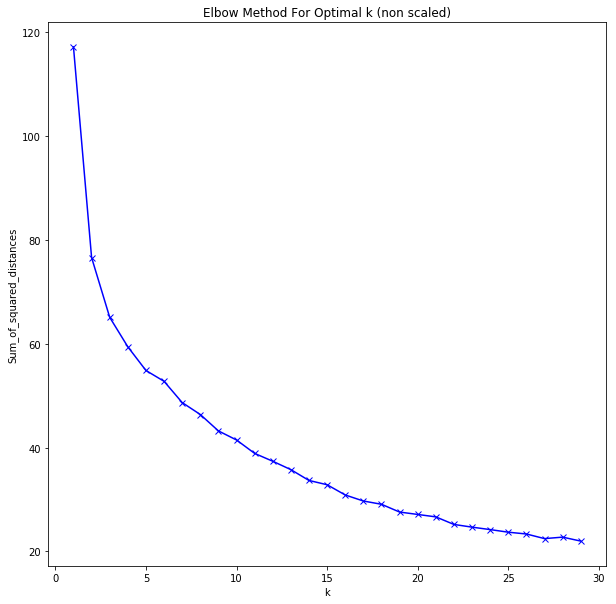

In [85]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(pca)
kmeansPcaLabels = kmeans.predict(pca)

In [91]:
kmeansPcaLabels

array([2, 2, 2, 3, 2, 4, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 1, 1, 2, 0, 3, 3,
       1, 3, 1, 0, 1, 1, 2, 1, 2, 1, 3, 1, 1, 0, 2, 1, 3, 1, 2, 3, 3, 2,
       4, 1, 1, 2, 3, 3, 1, 3, 1, 2, 2, 3, 2, 1, 3, 3, 0, 1, 1, 0, 4, 2,
       4, 3, 1, 3, 1, 1, 0, 1, 2, 3, 2, 3, 0, 3, 1, 0, 0, 2, 3, 3, 0, 0,
       3, 0, 0, 0, 3, 3, 3, 3, 1, 1, 2, 3, 1, 0, 2, 3, 3, 3, 0, 1, 1, 0,
       0, 1, 3, 1, 2, 2, 3, 0, 1, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 0, 2, 3, 3, 2, 2, 0, 3, 3, 1,
       3, 3, 0, 1, 3, 3, 2, 1, 2, 1, 0, 3, 3, 3, 3, 2, 1, 1, 0, 1, 2, 0,
       1, 0, 0, 3, 3, 0, 3, 2, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 0, 3, 0, 3,
       3, 3, 1, 0, 2, 3, 0, 1, 3, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 1, 3,
       3, 1, 0, 3, 2, 0, 1, 4, 2, 1, 1, 3, 1, 0, 0, 1, 2, 3, 1, 1, 3, 0,
       2, 3, 0, 4, 3, 2, 1, 2, 3, 2, 3, 0, 1, 3, 2, 1, 2, 3, 1, 1, 1, 0,
       0, 3, 3, 3, 1, 3, 0, 0, 2, 2, 3, 1, 1, 0, 2, 3, 1, 2, 0, 2, 3, 0,
       2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 0, 2, 1, 2, 2,

In [92]:
df['pca_16_k-means_labels'] = kmeansPcaLabels

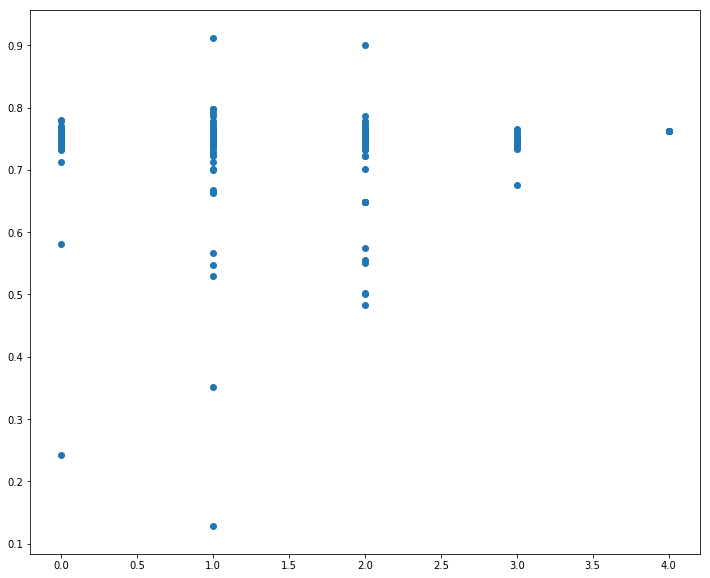

In [96]:
plt.figure(figsize=(12,10))
plt.scatter(x='pca_16_k-means_labels', y='Accuracy', data=df)

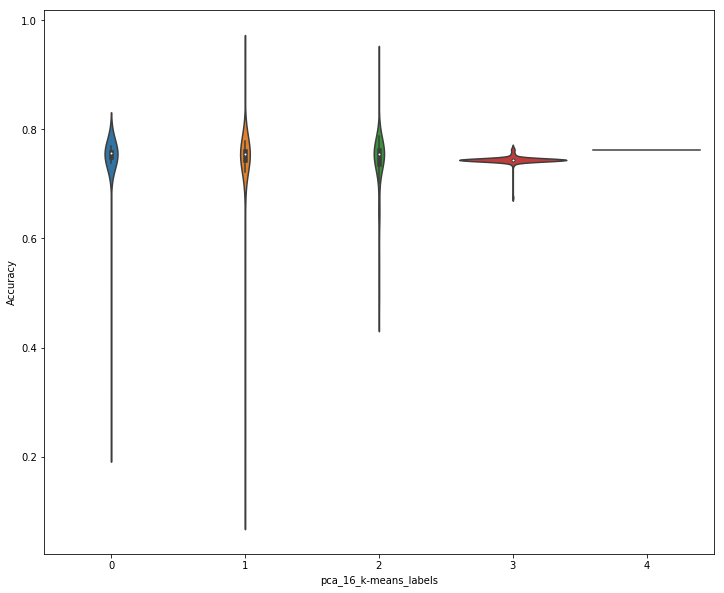

In [98]:
plt.figure(figsize=(12,10))
sns.violinplot(x='pca_16_k-means_labels', y='Accuracy', data=df)

## remove duplicates

In [16]:
names = pd.read_csv('416_names_accuracies.csv')['names'].values

In [30]:
fs = []

for idx, name in enumerate(names):
    f = (glob.glob('./r/kernels/'+name+'/script/*.R') + glob.glob('./r/kernels/'+name+'/script/*.r'))[0]
    file = open(f).read().rstrip('\n')
    fs.append(file)

In [31]:
df['code'] = fs

In [32]:
df.to_csv('titanicSummaryWithCode.csv', index=False)

In [73]:
df_unique = df.drop_duplicates(subset=['code'], keep='first').reset_index()

In [74]:
df_unique.tail()

,index,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,packs,string_packs,code
314,409,anthobau-random-forest-titanic,0.737,"['c', 'data.frame', 'factor', 'gsub', 'is.na',...","['dplyr', 'ggplot2', 'gridExtra', 'mice', 'ran...",5.557642,"['labs', 'complete', 'is.na', 'sapply', 'mice'...",[],['caleblau-predicting-survival-on-the-titanic'...,"[0.9609764008020771, 0.8663706538530083, 0.684...","{'package:base': ['c', 'data.frame', 'factor',...","{""package:base"": [""c"", ""data.frame"", ""factor"",...",packagebase c dataframe factor gsub isna libra...,library(dplyr)\nlibrary(ggplot2)\nlibrary(grid...
315,410,maitree-titanic-survival-list-using-classifica...,0.746,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'ggplot2', 'dplyr', 'base']",1.076901,"['nrow', 'mean', 'replace', 'which', 'as.chara...",[],['maitree-titanic-survival-list-using-classifi...,"[0.9999999999999999, 0.9908302848690036, 0.929...","{'character(0)': ['cabin_no', 'mean_class'], '...","{""character(0)"": [""cabin_no"", ""mean_class""], ""...",character0 cabinno meanclass packagebase ascha...,"library(ggplot2)\nlibrary(readr)\nsystem(""ls ...."
316,412,devanshugupta27-predicting-the-titanic-surviva...,0.754,"['filter', 'c', 'character', 'data.frame', 'fa...","['ggplot2', 'lattice', 'caret', 'ranger', 'dpl...",8.990692,"['is.na', 'vapply', 'prop.table', 'summary', '...",[],['stevencahill-titanic-machine-learning-from-d...,"[0.4389744098860309, 0.43830929572150873, 0.43...","{'c(""package:dplyr"", ""package:stats"")': ['filt...","{""c(""package:dplyr"", ""package:stats"")"": [""filt...",cpackagedplyr packagestats filter packagebase ...,library(ggplot2)\nlibrary(lattice)\nlibrary(ca...
317,414,phubert-titanic-mackenzie-aula08,0.701,"['as.matrix', 'c', 'data.frame', 'ifelse', 'is...","['tidyverse', 'xgboost', 'caret', 'reshape', '...",6.496891,"['labs', 'nrow', 'mean', 'xgb.cv', 'annotate',...",[],"['phubert-mackenzie-bigdata-titanic-knn', 'phu...","[0.41193110095318214, 0.2235715290657347, 0.21...","{'package:base': ['as.matrix', 'c', 'data.fram...","{""package:base"": [""as.matrix"", ""c"", ""data.fram...",packagebase asmatrix c dataframe ifelse isna l...,"library(tidyverse)\ndados = read.csv(""../input..."
318,415,haroldzhang-titanic-ace233,0.770,"['user defined', 'user defined', 'user defined...","['randomForest', 'base']",9.443184,"['which.min', 'list', 'mean', 'which.max', 'me...",[],['haroldzhang-exploring-survival-on-the-titani...,"[0.9998196222829159, 0.10383435233883295, 0.08...","{'character(0)': ['fullfillAgeData', 'fullfill...","{""character(0)"": [""fullfillAgeData"", ""fullfill...",character0 fullfillAgeData fullfillEmbark full...,"library(""randomForest"")\nreAssembleVariable = ..."


In [129]:
uns  = df_unique['pca_16'].values

us = []

for u in uns:
    us.append(list(u))
    
us = np.asarray(us)

In [131]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(us)
    Sum_of_squared_distances.append(kmeans.inertia_)

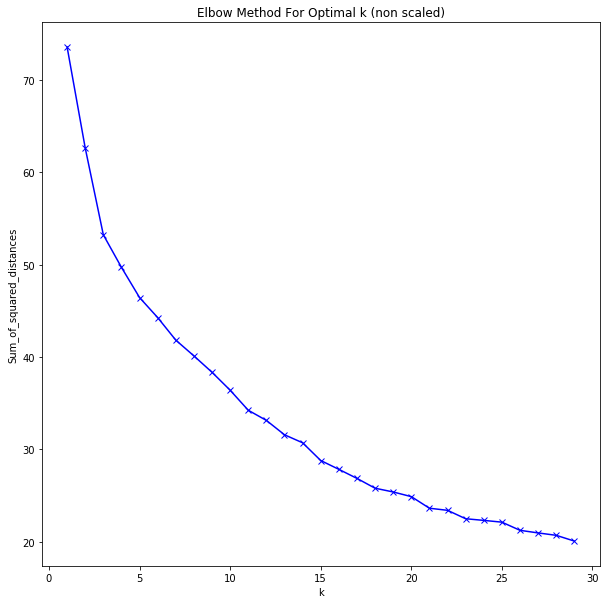

In [132]:
plt.figure(figsize=(10,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (non scaled)')
plt.show()

In [212]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(us)
kmeansPcaLabels = kmeans.predict(us)

In [213]:
df_unique['unique_labels'] = kmeansPcaLabels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0, 0.5, 'accuracy')

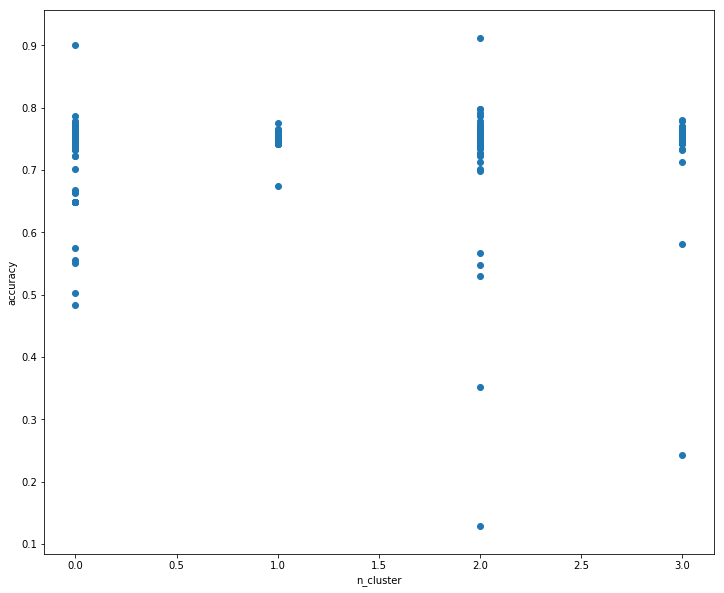

In [214]:
plt.figure(figsize=(12,10))
plt.scatter(x='unique_labels', y='Accuracy', data=df_unique)
plt.xlabel('n_cluster')
plt.ylabel('accuracy')

In [125]:
df[df['k-means_labels'] == 3]

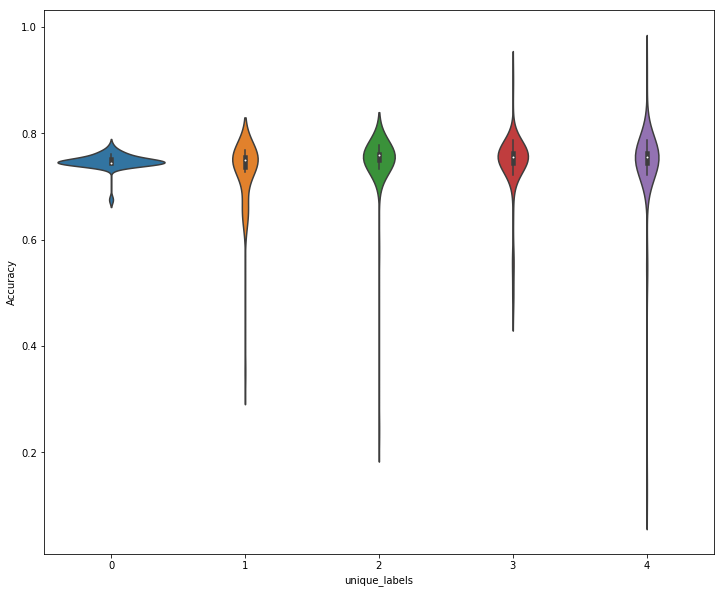

In [154]:
plt.figure(figsize=(12,10))
sns.violinplot(x='unique_labels', y='Accuracy', data=df_unique)

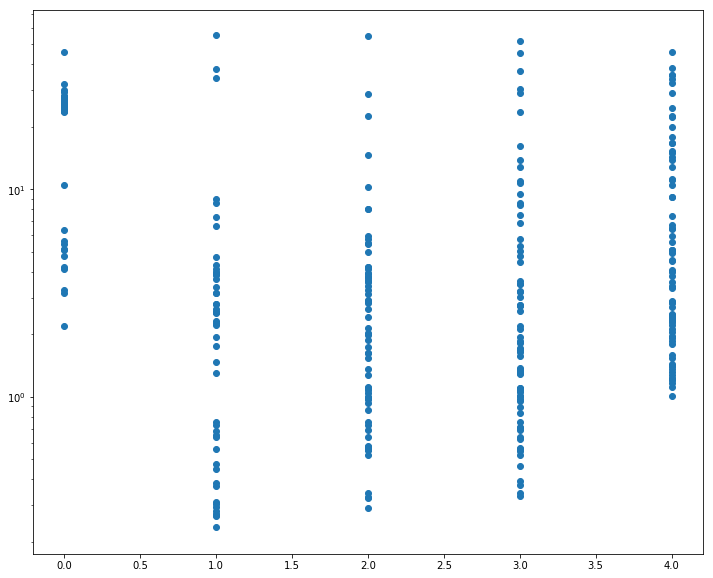

In [146]:
plt.figure(figsize=(12,10))
plt.scatter(x='unique_labels', y='Runtime', data=df_unique)
plt.yscale("log")

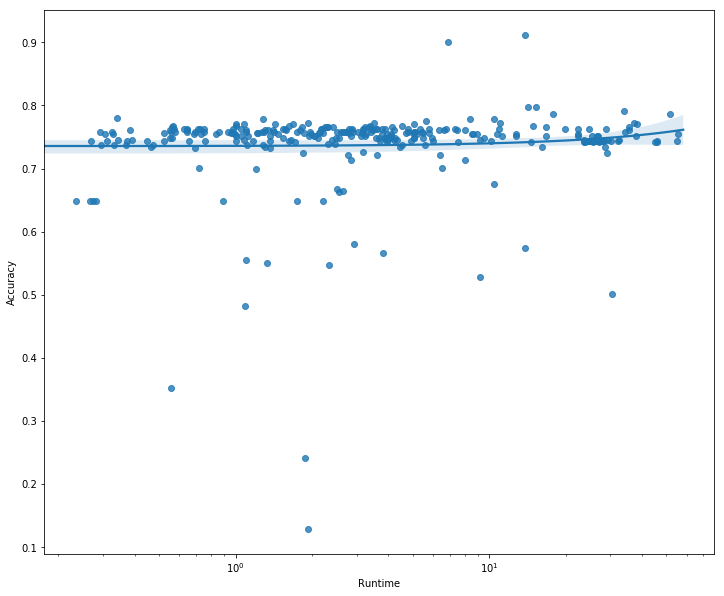

In [158]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique)
plt.xscale("log")

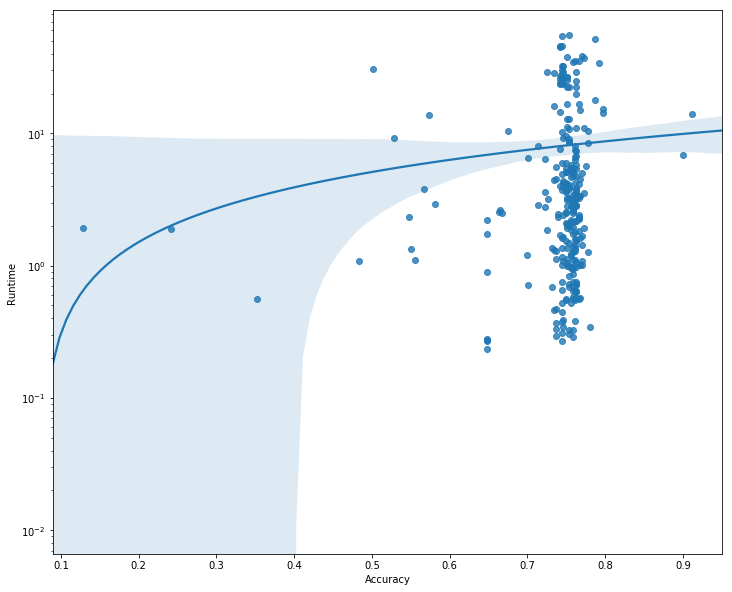

In [159]:
plt.figure(figsize=(12,10))
sns.regplot(y='Runtime', x='Accuracy', data=df_unique)
plt.yscale("log")

Text(0, 0.5, 'Runtime')

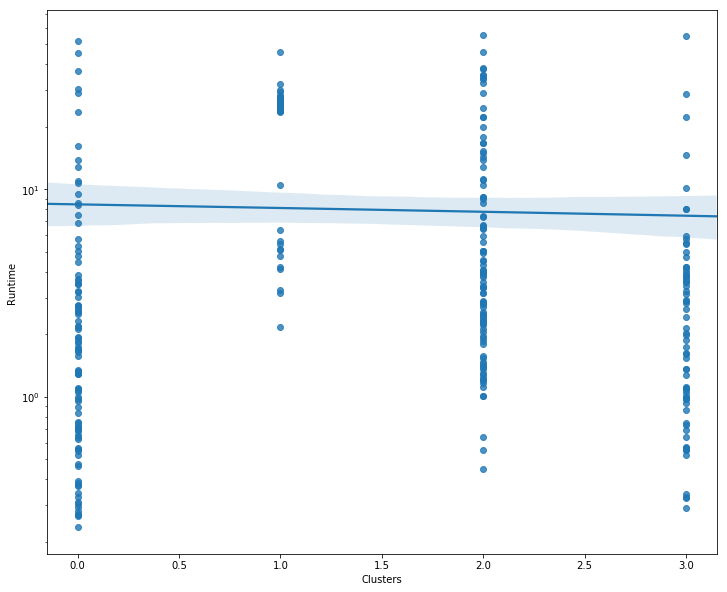

In [215]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='unique_labels', y='Runtime', data=df_unique)
plt.yscale("log")
plt.xlabel('Clusters')
plt.ylabel('Runtime')

### DBscan

In [170]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import  MinMaxScaler, MaxAbsScaler

In [174]:
scaler = MaxAbsScaler()
scaled_us = scaler.fit_transform(us)

In [198]:
db = DBSCAN(eps = 0.05, min_samples = 5).fit(us) 
labels1 = db.labels_

In [199]:
labels1

array([-1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1

### umap

In [207]:
import umap.umap_ as umap
import plotly.graph_objects as go

In [201]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(us)

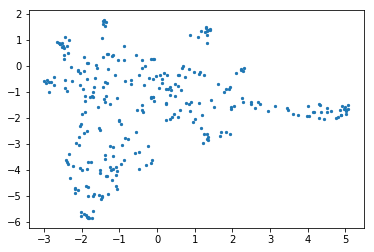

In [205]:
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], s=5.0, cmap='Spectral')

In [209]:
x = standard_embedding[:, 0]
y = standard_embedding[:, 1]
#urls = ['https://google.com', 'https://bing.com', 'https://duckduckgo.com']

f = go.FigureWidget(data=go.Scatter(
    x = standard_embedding[:, 0],
    y = standard_embedding[:, 1],
    hovertext = df_unique.Name,
    mode='markers',
    marker=dict(
        size=8,
        color=df_unique.Accuracy,
        colorscale='Spectral',
        showscale=True,
        line_width=1
    )
))

scatter = f.data[0]

f.update_layout(template='plotly_white', width=800, height=600,)

f

FigureWidget({
    'data': [{'hovertext': array(['prabhulingayya-titanic-prediction-using-logistic-regression'…

In [210]:
x = standard_embedding[:, 0]
y = standard_embedding[:, 1]
#urls = ['https://google.com', 'https://bing.com', 'https://duckduckgo.com']

f = go.FigureWidget(data=go.Scatter(
    x = standard_embedding[:, 0],
    y = standard_embedding[:, 1],
    hovertext = df_unique.Name,
    mode='markers',
    marker=dict(
        size=8,
        color=df_unique.Runtime,
        colorscale='Spectral',
        showscale=True,
        line_width=1
    )
))

scatter = f.data[0]

f.update_layout(template='plotly_white', width=800, height=600,)

f

FigureWidget({
    'data': [{'hovertext': array(['prabhulingayya-titanic-prediction-using-logistic-regression'…

In [223]:
df_unique[df_unique['Accuracy'] < 0.5]

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels,pca_16,pca_16_k-means_labels,unique_labels
91,klashgari-titanic,0.242,"['apply', 'as.numeric', 'c', 'is.na', 'library...","['ggplot2', 'readr', 'caret', 'reshape2', 'rpa...",1.882592,"['formula', 'as.numeric', 'sum', 'predict', 'w...",[],['brirush-randomforest-implementation-of-titan...,"[0.4318369592129066, 0.4318369592129066, 0.389...","{'package:base': ['apply', 'as.numeric', 'c', ...",[[[[[0. 0. 0. 0. ...,0,"[-0.34942495200365653, 0.18395359214549048, 0....",0,3
157,rahul169-titanic-prediction,0.129,"['as.factor', 'cbind', 'colSums', 'factor', 'i...","['ggplot2', 'randomForest', 'base']",1.921240,"['factor', 'varImpPlot', 'predict', 'write.csv...",[],"['paulbisto-r-titanic-script-practice', 'prade...","[0.7186819656869823, 0.7152472332609054, 0.715...","{'package:base': ['as.factor', 'cbind', 'colSu...",[[[[[0. 0. 0. 0. ...,3,"[-0.13409056046837142, -0.1257671294360656, -0...",1,2
272,maitree-titanic-survival-list-using-random-forest,0.483,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'ggplot2', 'dplyr', 'rand...",1.087711,"['nrow', 'mean', 'replace', 'which', 'as.chara...",[],['maitree-titanic-survival-list-using-classifi...,"[0.9908302848690036, 0.9375256144339168, 0.923...","{'character(0)': ['cabin_no', 'mean_class'], '...",[[[[[0. 0. 0. 0. ...,3,"[-0.27762046983384475, -0.1997278156331216, 0....",2,0
402,ivanbaj-part-2-titanic-encounters-vowpal-wabbi...,0.352,"['library', 'mutate', 'select', 'tbl_df', 'rea...","['dplyr, warn.conflicts = FALSE', 'base']",0.556960,"['mutate', 'write.csv', 'tbl_df', 'read.csv', ...",[],"['sawajid-titanic-test', 'zhaotianjing-titanic...","[0.41120320603795557, 0.37763523433734214, 0.3...","{'package:base': ['library'], 'package:dplyr':...",[[[[[0. 0. 0. 0. ...,1,"[-0.18690565800546097, -0.07133045281232266, -...",1,2


In [52]:
#'caret' in 
df_unique['Packages'].values

array(["['base']",
       "['dplyr', 'ggplot2', 'rpart', 'randomForest', 'base']",
       "['MASS', 'ggplot2', 'ggthemes', 'base']",
       "['ggplot2', 'ggthemes', 'scales', 'dplyr', 'mice', 'randomForest', 'base']",
       "['ggplot2', 'readr', 'data.table', 'stringr', 'caret', 'base']",
       "['randomForest', 'base']",
       "['ggplot2', 'ggthemes', 'scales', 'dplyr', 'mice', 'randomForest', 'base']",
       "['dplyr', 'ggplot2', 'neuralnet', 'base']",
       "['caTools', 'randomForest', 'base']",
       "['tidyverse', 'tidyverse', 'ggplot2', 'ggthemes', 'scales', 'dplyr', 'mice', 'randomForest', 'base']",
       "['ggplot2', 'dplyr', 'randomForest', 'ggplot2', 'readr', 'base']",
       "['caret', 'base']", "['ggplot2', 'randomForest', 'base']",
       "['Hmisc', 'knitr', 'ggplot2', 'dplyr', 'caret', 'randomForest', 'gridExtra', 'ROCR', 'corrplot', 'base']",
       "['ggplot2', 'ggthemes', 'scales', 'dplyr', 'randomForest', 'forcats', 'caret', 'dummies', 'base']",
       "['ggplo

# One Hot ML packages

In [104]:
forest = []
neural = []
caret = []
mice = []
base = []
clas = []

glmnet = []
mass = []
car = []
xgboost = []
rpart = []
caretEnsemble = []
e1071 = []
rann = []
amelia = []
hmisc = []
missforest = []



for p in df_unique['Packages']:
    
    if 'randomForest' in p:
        forest.append(1)
    else:
        forest.append(0)
        
    if 'neuralnet' in p:
        neural.append(1)
    else:
        neural.append(0)
    
    if 'caret' in p:
        caret.append(1)
    else:
        caret.append(0)
   
    if 'mice' in p:
        mice.append(1)
    else:
        mice.append(0)
   
    if 'class' in p:
        clas.append(1)
    else:
        clas.append(0)
    
    if 'glmnet' in p:
        glmnet.append(1)
    else:
        glmnet.append(0)
    
    if 'MASS' in p:
        mass.append(1)
    else:
        mass.append(0)
    
    if 'car' in p:
        car.append(1)
    else:
        car.append(0)
    
    if 'xgboost' in p:
        xgboost.append(1)
    else:
        xgboost.append(0)
    
    if 'rpart' in p:
        rpart.append(1)
    else:
        rpart.append(0)
    
    if 'caretEnsemble' in p:
        caretEnsemble.append(1)
    else:
        caretEnsemble.append(0)
    
    if 'e1071' in p:
        e1071.append(1)
    else:
        e1071.append(0)
    
    if 'RANN' in p:
        rann.append(1)
    else:
        rann.append(0)
    
    if 'Amelia' in p:
        amelia.append(1)
    else:
        amelia.append(0)
        
    if 'Hmisc' in p:
        hmisc.append(1)
    else:
        hmisc.append(0)
        
    if 'missForest' in p:
        missforest.append(1)
    else:
        missforest.append(0)
    
    if p == "['base']":
        base.append(1)
    else:
        base.append(0)

In [105]:
len(e1071)

319

In [106]:
df_unique['forest'] = forest
df_unique['neural'] = neural
df_unique['caret'] = caret
df_unique['mice'] = mice
df_unique['base'] = base
df_unique['glmnet'] = glmnet
df_unique['mass'] = mass
df_unique['car'] = car
df_unique['xgboost'] = xgboost
df_unique['rpart'] = rpart
df_unique['caretEnsemble'] = caretEnsemble
df_unique['e1071'] = e1071
df_unique['rann'] = rann
df_unique['amelia'] = amelia
df_unique['hmisc'] = hmisc
df_unique['missforest'] = missforest

In [127]:
df_unique[df_unique['hmisc'] == 1]

,index,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,...,car,xgboost,rpart,caretEnsemble,e1071,rann,amelia,hmisc,mi,missforest
13,15,zahoorahmad-titanic-2nd-degree-families-and-ma...,0.797,"['summarize', 'filter', 'user defined', 'user ...","['Hmisc', 'knitr', 'ggplot2', 'dplyr', 'caret'...",14.275347,"['as.ordered', 'theme', 'lm', 'range', 'set.se...",[],['zahoorahmad-titanic-2nd-degree-families-and-...,"[0.9999999999999999, 0.9999999999999999, 0.999...",...,1,0,0,0,0,0,0,1,1,0
137,171,aeintngon-titanic-exploratory-analysis,0.751,"['filter', 'user defined', 'user defined', 'us...","['ggplot2', 'dplyr', 'ggthemes', 'stringr', 'k...",12.765220,"['summarise', 'geom_label', 'mean', 'geom_text...",[],['ravikrishnareddy-titanic-survival-prediction...,"[0.7398404707988901, 0.711424231970933, 0.7032...",...,1,0,0,0,0,0,0,1,1,0
148,185,ravikrishnareddy-titanic-survival-prediction,0.751,"['user defined', 'user defined', 'user defined...","['ggplot2', 'gridExtra', 'dplyr', 'forcats', '...",16.699411,"['summarise', 'as.ordered', 'labs', 'unlist', ...",[],['zahoorahmad-titanic-2nd-degree-families-and-...,"[0.7758378373114984, 0.7758378373114984, 0.775...",...,1,0,0,0,0,0,0,1,1,0
159,200,divyasshree-titanic-ml-club,0.713,"['c', 'data.frame', 'factor', 'gsub', 'is.na',...","['ggplot2', 'scales', 'dplyr', 'randomForest',...",2.854176,"['labs', 'median', 'is.na', 'scale_x_continuou...",[],"['vishnusaiv-titanic-data-analysis', 'xuhuiz09...","[0.8805599997344629, 0.868494271993149, 0.4703...",...,0,0,0,0,0,0,0,1,1,0
160,201,sylphsangeeta-titanic,0.754,"['c', 'cat', 'data.frame', 'duplicated', 'fact...","['dplyr', 'ggplot2', 'ggplot2', 'dplyr', 'dply...",3.767788,"['summarise', 'nrow', 'list', 'merge', 'cat', ...",[],"['avikpaul4u-titanic-machine-learning-in-r', '...","[0.10401875728258922, 0.07708535487047534, 0.0...",...,0,0,1,0,0,0,0,1,1,0
209,257,lokesharun-titanic,0.758,"['as.factor', 'c', 'colSums', 'data.frame', 'f...","['dplyr', 'mice', 'ggplot2', 'ggthemes', 'Hmis...",4.778127,"['labs', 'complete', 'lapply', 'is.na', 'colSu...",[],['pradeeptripathi-prediction-of-titanic-surviv...,"[0.9335045189166102, 0.9333316957960868, 0.894...",...,1,0,0,0,1,0,0,1,1,0
255,315,harsh2-exploring-the-titanic-dataset,0.778,"['summarize', 'filter', 'user defined', 'user ...","['Hmisc', 'knitr', 'ggplot2', 'dplyr', 'caret'...",10.471190,"['summarise', 'as.ordered', 'nrow', 'labs', 'g...",[],['zahoorahmad-titanic-2nd-degree-families-and-...,"[0.9697038119098774, 0.9697038119098774, 0.968...",...,1,0,0,0,1,0,0,1,1,0
288,369,erikbruin-titanic-2nd-degree-families-and-majo...,0.797,"['summarize', 'filter', 'user defined', 'user ...","['Hmisc', 'knitr', 'ggplot2', 'dplyr', 'caret'...",15.231850,"['as.ordered', 'theme', 'lm', 'range', 'set.se...",[],['zahoorahmad-titanic-2nd-degree-families-and-...,"[0.999330334203471, 0.999330334203471, 0.96873...",...,1,0,0,0,0,0,0,1,1,0
291,372,harryem-titanic-comparing-two-approaches-for-m...,0.529,"['count', 'summarise', 'rbind', 'complete', 'a...","['ggplot2', 'scales', 'grid', 'plyr', 'dplyr',...",9.211235,"['summarise', 'labs', 'complete', 'mean', 'fac...",[],"['terfilip-titanic', 'vasuls-predictive-analys...","[0.828654160390233, 0.10143514910673265, 0.101...",...,1,0,0,0,0,0,0,1,1,0
292,373,chuanhuiliu-one-solution-to-titanic-survival-a...,0.761,"['as.factor', 'as.numeric', 'c', 'cbind', 'dat...","['tidyverse', 'rpart', 'rpart.plot', 'caret', ...",4.216579,"['labs', 'mean', 'is.na', 'levels', 'scale_x_c...",[],"['jasonhit-first-script-for-kaggle-titanic', '...","[0.7666662074163463, 0.7633898711229825, 0.763...",...,1,0,1,0,0,0,0,1,1,0


(0.5, 0.9)

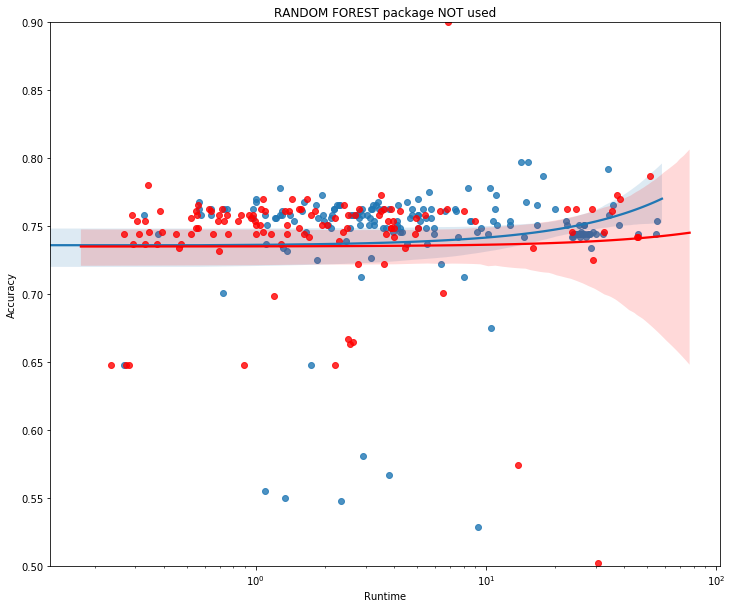

In [278]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['forest'] == 1])
plt.xscale("log")
plt.title('RANDOM FOREST package used')
plt.ylim(0.5, 0.9)
#plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['forest'] == 0], color = 'r')
plt.xscale("log")
plt.title('RANDOM FOREST package NOT used')
plt.ylim(0.5, 0.9)

(0.5, 0.9)

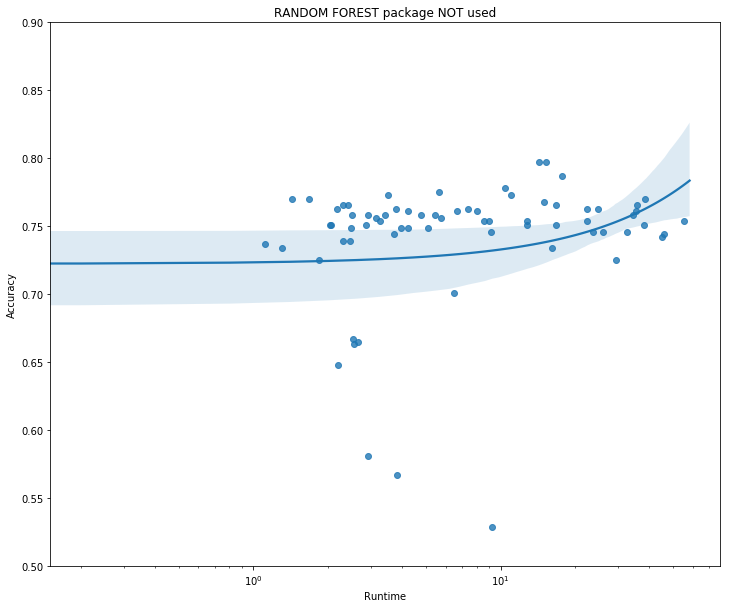

In [64]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['car'] == 1])
plt.xscale("log")
plt.title('RANDOM FOREST package NOT used')
plt.ylim(0.5, 0.9)

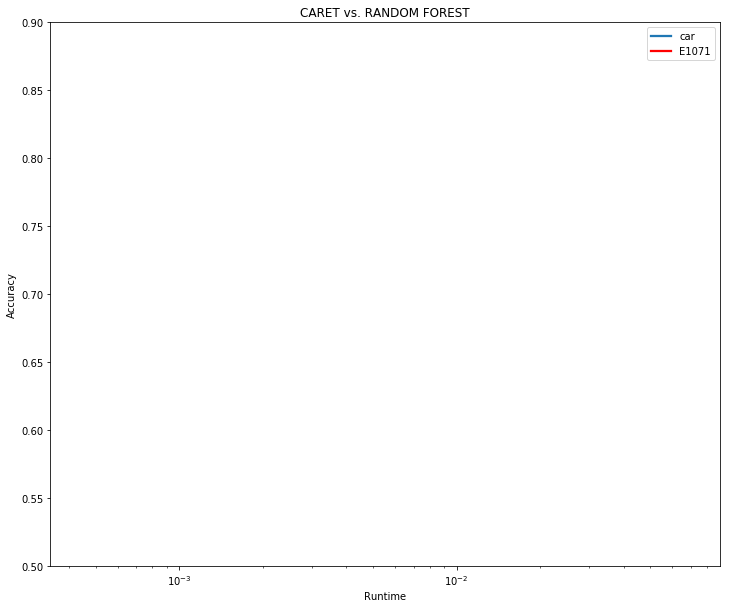

In [65]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['car'] == 0][df_unique[df_unique['car'] == 0]['E1071'] == 1])
plt.xscale("log")
plt.title('CARET vs. RANDOM FOREST')
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['E1071'] == 1], color = 'r')
plt.xscale("log")
plt.ylim(0.5, 0.9)
plt.legend(['car', 'E1071'])

(0.5, 0.9)

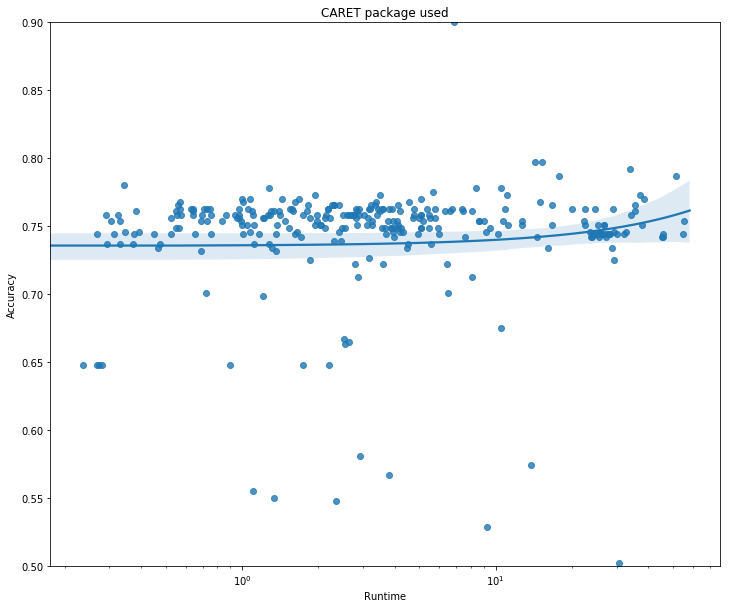

In [275]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique)
plt.xscale("log")
plt.title('CARET package used')
plt.ylim(0.5, 0.9)

(0.5, 0.9)

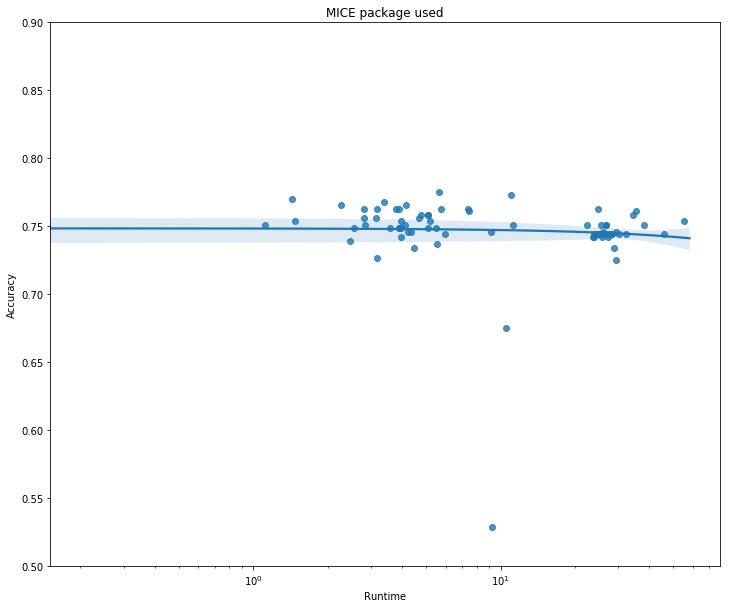

In [269]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['mice'] == 1])
plt.xscale("log")
plt.title('MICE package used')
plt.ylim(0.5, 0.9)

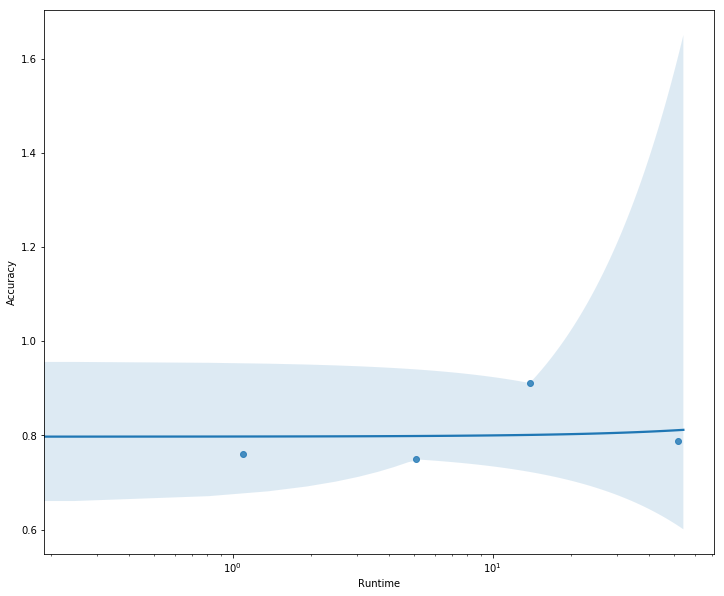

In [245]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['neural'] == 1])
plt.xscale("log")

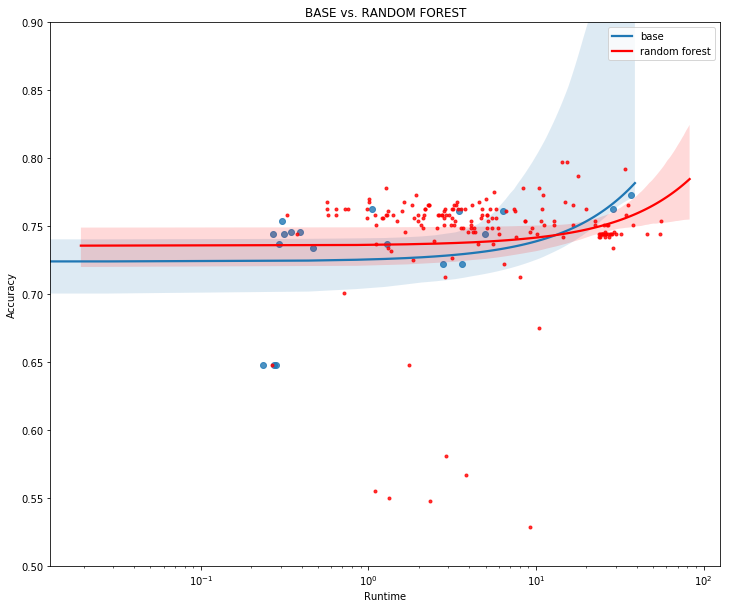

In [288]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['base'] == 1])
plt.xscale("log")
plt.title('BASE vs. RANDOM FOREST')
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['forest'] == 1], color='r', marker='.')
plt.xscale("log")
plt.ylim(0.5, 0.9)
plt.legend(['base', 'random forest'])

In [261]:
df_unique['Packages'][0]

"['base']"

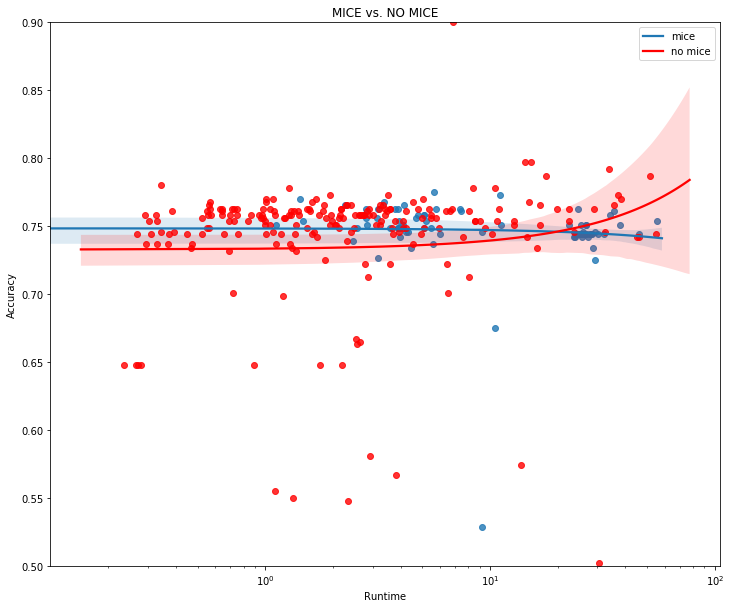

In [289]:
plt.figure(figsize=(12,10))
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['mice'] == 1])
plt.xscale("log")
plt.title('MICE vs. NO MICE')
sns.regplot(x='Runtime', y='Accuracy', data=df_unique[df_unique['mice'] == 0], color='r')
plt.xscale("log")
plt.ylim(0.5, 0.9)
plt.legend(['mice', 'no mice'])

In [295]:
df_unique[df_unique['caret'] == 1][df_unique[df_unique['caret'] == 1]['forest'] == 0]

,Name,Accuracy,Functions,Packages,Runtime,Functions_by_users,Copy_of,most_similar,index_of_similarity,raw_json,dense_tf,k-means_labels,pca_16,pca_16_k-means_labels,unique_labels,forest,neural,caret,mice,base
4,jonmak-identify-travel-groups-in-titanic,0.734,"['user defined', 'user defined', 'user defined...","['ggplot2', 'readr', 'data.table', 'stringr', ...",16.105898,"['list', 'mean', 'as.logical', 'merge', 'geom_...",[],"['somtom-titanic-random-icebergs', 'rtreit-kag...","[0.6239748114808571, 0.2672313419911298, 0.170...","{'character(0)': ['`:=`'], 'package:base': ['a...",[[[[[0. 0. 0. 0. ...,3,"[-0.25692088149317693, -0.19752431202561158, 0...",2,0,0,0,1,0,0
13,balakesavan-titanicbalakesavan20160921,0.770,"['as.data.frame', 'as.numeric', 'c', 'colnames...","['caret', 'base']",1.676510,"['colnames', 'as.numeric', 'ifelse', 'confusio...",[],['prabhulingayya-titanic-prediction-using-logi...,"[0.09013728602561581, 0.09003094444888107, 0.0...","{'package:base': ['as.data.frame', 'as.numeric...",[[[[[0. 0. 0. 0. ...,3,"[-0.31920280477496216, -0.16508482398771585, -...",2,0,0,0,1,0,0
31,bubblride-titanic-e1071-c-svc-five-features,0.663,"['as.factor', 'ifelse', 'is.na', 'library', 'l...","['e1071', 'caret', 'tidyverse', 'base']",2.557764,"['which.max', 'svm', 'is.na', 'confusionMatrix...",[],"['bubblride-titanic-e1071-c-svc-fares-only', '...","[0.6051153767373889, 0.6032463547792813, 0.279...","{'package:base': ['as.factor', 'ifelse', 'is.n...",[[[[[0. 0. 0. 0. ...,3,"[-0.2560158190589517, -0.1764198734571483, -0....",1,0,0,0,1,0,0
45,redroy44-tidy-titanic-script,0.770,"['filter', 'complete', 'as.character', 'as.fac...","['tidyverse', 'forcats', 'stringr', 'caret', '...",1.432869,"['fct_recode', 'complete', 'str_trim', 'as.cha...",[],"['srikantjyrmn-titanic-survivor', 'monfilier-t...","[0.74142082512708, 0.7094866478745119, 0.68966...","{'c(""package:dplyr"", ""package:stats"")': ['filt...",[[[[[0. 0. 0. 0. ...,1,"[-0.11208330784017108, -0.12749565711289032, -...",1,2,0,0,1,1,0
52,bubblride-titanic-e1071-nu-svc,0.665,"['as.factor', 'is.na', 'library', 'list.files'...","['e1071', 'caret', 'tidyverse', 'base']",2.644896,"['mutate', 'createDataPartition', 'confusionMa...",[],"['bubblride-titanic-e1071-c-svc-fares-only', '...","[0.95475567436889, 0.6032463547792813, 0.39557...","{'package:base': ['as.factor', 'is.na', 'libra...",[[[[[0. 0. 0. 0. ...,3,"[-0.22673276733206726, -0.1487037745359692, -0...",1,0,0,0,1,0,0
73,tavoosi-predicting-survival-on-the-titanic-wit...,0.770,"['user defined', 'user defined', 'user defined...","['tidyverse', 'ggthemes', 'corrplot', 'VIM', '...",38.395133,"['labs', 'cor', 'rename', 'theme', 'subset', '...",[],"['srikantjyrmn-titanic-survivor', 'monfilier-t...","[0.8023446946094221, 0.7654240657740825, 0.743...","{'character(0)': ['set'], 'package:base': ['as...",[[[[[0. 0. 0. 0. ...,3,"[-0.25145689827074447, -0.22438514422297895, 0...",1,2,0,0,1,0,0
91,klashgari-titanic,0.242,"['apply', 'as.numeric', 'c', 'is.na', 'library...","['ggplot2', 'readr', 'caret', 'reshape2', 'rpa...",1.882592,"['formula', 'as.numeric', 'sum', 'predict', 'w...",[],['brirush-randomforest-implementation-of-titan...,"[0.4318369592129066, 0.4318369592129066, 0.389...","{'package:base': ['apply', 'as.numeric', 'c', ...",[[[[[0. 0. 0. 0. ...,0,"[-0.34942495200365653, 0.18395359214549048, 0....",0,3,0,0,1,0,0
98,danvargg-titanic-passenger-survival,0.739,"['as.factor', 'data.frame', 'dim', 'factor', '...","['e1071', 'caret', 'base']",2.310979,"['factor', 'dim', 'predict', 'write.csv', 'dat...",[],"['danvargg-titanic-passenger-survival', 'briru...","[0.9999999999999998, 0.4109475042759608, 0.410...","{'package:base': ['as.factor', 'data.frame', '...",[[[[[0. 0. 0. 0. ...,3,"[-0.19956944748390365, -0.04009271419239109, -...",2,0,0,0,1,0,0
101,johnlam-titanic-dataset-and-learning-decision-...,0.758,"['filter', 'data.frame', 'dim', 'is.na', 'libr...","['dplyr', 'rpart', 'rattle', 'rpart.plot', 'RC...",3.421344,"['summarise', 'median', 'whi

In [94]:
df_unique.to_csv('df_unique_one_hot.csv', index=False)